# **Sporting Bet Data Analysis Project**
### Prepared by Mashrura Siraj & Debanjali Das
### Supervised by Project Cohort Tom

In [ ]:
## Importation of different libraries and packages for data analysis

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from tabulate import tabulate ###### why this one is imported???





In [ ]:
# Read the ATP matches dataset CSV file
"""Here, the file related to the project sporting bet is loaded for the analysis"""
df_atp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/atp_data.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""Data Exploration of the project sporting bet starts here
first o all the data structure of the original dataset is inspected followed by the data Preview, Descriptive statistics, handeling missing values as well as datatype
for the purpose of data exploration, data vizualization and preprocessing """

'Data Exploration of the project sporting bet starts here\nfirst o all the data structure of the original dataset is inspected followed by the data Preview, Descriptive statistics, handeling missing values as well as datatype\nfor the purpose of data exploration, data vizualization and preprocessing '

# **1. Data Exploration:**

## **1. Inspect the data structure**

In [ ]:
# Check the number of rows and columns
print(df_atp.shape)

(44708, 23)


In [ ]:
# Get a concise summary of the DataFrame
#Displaying the Data type and the count for non-null value

print(df_atp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

In [ ]:
# View the column names
print(df_atp.columns)

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets',
       'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner',
       'elo_loser', 'proba_elo'],
      dtype='object')


## **2. Preview of data**

In [ ]:
# Display the first few rows
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [ ]:

# Display the last few rows
df_atp.tail()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,Pouille L.,23,15,2.0,0.0,Completed,1.65,2.43,1.66,2.20,1835.901543,1842.459807,0.490563
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,Donaldson J.,8,59,2.0,1.0,Completed,1.34,3.63,1.30,3.50,1843.576914,1647.967561,0.755103
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,Zeballos H.,73,69,2.0,1.0,Completed,1.85,2.09,1.90,1.90,1588.293069,1619.758421,0.454841
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,Anderson K.,9,8,2.0,0.0,Completed,1.52,2.75,1.50,2.62,1966.532849,1851.413609,0.659862
44707,18,Sao Paulo,Brasil Open,2018-03-04,ATP250,Indoor,Clay,The Final,3,Fognini F.,Jarry N.,20,73,2.0,1.0,Completed,1.38,3.38,1.36,3.25,1814.065865,1605.738153,0.768388


## **3. Discriptive Statistics**

In [ ]:
# Statistic description of quantitative data
df_atp.describe()

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
count,44708.000000,44708.000000,44708.000000,44708.000000,44521.000000,44521.000000,32743.000000,32743.000000,39037.000000,39057.000000,44708.000000,44708.000000,44708.000000
mean,32.803659,3.372596,59.159681,93.674108,2.140630,0.406325,1.927563,4.240179,1.822246,3.551007,1684.023280,1608.755552,0.585594
std,18.170565,0.778702,74.881003,124.987643,0.462388,0.557349,1.359136,5.744329,1.107547,3.498689,179.246422,137.949299,0.198732
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010000,1.000000,1.002000,1318.945207,1327.551888,0.008899
25%,19.000000,3.000000,17.000000,35.000000,2.000000,0.000000,1.270000,1.794000,1.220000,1.720000,1548.476977,1501.546103,0.447921
50%,32.000000,3.000000,41.000000,65.000000,2.000000,0.000000,1.549000,2.660000,1.500000,2.500000,1652.866073,1580.743828,0.589218
75%,49.000000,3.000000,77.000000,105.000000,2.000000,1.000000,2.140000,4.270000,2.000000,4.000000,1780.755524,1684.607134,0.737288
max,69.000000,5.000000,2000.000000,2000.000000,3.000000,2.000000,46.000000,121.000000,29.000000,101.000000,2392.408923,2392.595567,0.995601


In [ ]:
# Calculate the correlation between columns
df_atp.corr()

<ipython-input-16-98467fc54c18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_atp.corr()


,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
ATP,1.000000,-0.046387,-0.008965,-0.016897,-0.043327,-0.001104,0.010970,-0.019625,0.012286,-0.029850,0.047014,0.074960,-0.008273
Best of,-0.046387,1.000000,-0.066836,-0.020708,0.818574,0.231996,-0.028799,0.213841,-0.033153,0.220608,0.118747,0.003619,0.105426
WRank,-0.008965,-0.066836,1.000000,0.109713,-0.070822,0.039472,0.279636,-0.226377,0.307362,-0.266269,-0.498217,-0.170002,-0.379164
LRank,-0.016897,-0.020708,0.109713,1.000000,-0.003649,-0.053960,-0.190789,0.150884,-0.208825,0.185399,-0.156366,-0.388834,0.157354
Wsets,-0.043327,0.818574,-0.070822,-0.003649,1.000000,0.225547,-0.056107,0.194150,-0.059774,0.203297,0.119892,-0.012988,0.123047
Lsets,-0.001104,0.231996,0.039472,-0.053960,0.225547,1.000000,0.113068,-0.107632,0.120241,-0.118149,-0.065344,0.066541,-0.113640
PSW,0.010970,-0.028799,0.279636,-0.190789,-0.056107,0.113068,1.000000,-0.273308,0.975043,-0.333448,-0.309118,0.397112,-0.612286
PSL,-0.019625,0.213841,-0.226377,0.150884,0.194150,-0.107632,-0.273308,1.000000,-0.297240,0.893226,0.504034,-0.158542,0.507427
B365W,0.012286,-0.033153,0.307362,-0.208825,-0.059774,0.120241,0.975043,-0.297240,1.000000,-0.371729,-0.335506,0.418323,-0.663752
B365L,-0.029850,0.220608,-0.266269,0.185399,0.203297,-0.118149,-0.333448,0.893226,-0.371729,1.000000,0.563668,-0.175170,0.595157


## **4. Checking and Handeling Missing Values**

In [ ]:
# Displaying the total number of missing values
display(df_atp.isna())
display(df_atp.sum())
display(df_atp.isna().sum().sum())

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44704,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44705,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44706,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


ATP                                                     1466586
Location      AdelaideDohaDohaDohaDohaDohaDohaDohaChennaiChe...
Tournament    Australian Hardcourt ChampionshipsQatar OpenQa...
Date          2000-01-032000-01-032000-01-032000-01-032000-0...
Series        InternationalInternationalInternationalInterna...
Court         OutdoorOutdoorOutdoorOutdoorOutdoorOutdoorOutd...
Surface       HardHardHardHardHardHardHardHardHardHardHardHa...
Round         1st Round1st Round1st Round1st Round1st Round1...
Best of                                                  150782
Winner        Dosedel S.Kiefer N.Gaudio G.El Aynaoui Y.Cherk...
Loser         Ljubicic I.Tarango J.Luxa P.Dupuis A.Arazi H.H...
WRank                                                   2644911
LRank                                                   4187982
Wsets                                                   95303.0
Lsets                                                   18090.0
Comment       CompletedCompletedComplete

35626

In [ ]:
# Calculating the percentage of missing values for each column
missing_percentages = (df_atp.isnull().sum() / len(df_atp)) * 100
display(missing_percentages)

ATP            0.000000
Location       0.000000
Tournament     0.000000
Date           0.000000
Series         0.000000
Court          0.000000
Surface        0.000000
Round          0.000000
Best of        0.000000
Winner         0.000000
Loser          0.000000
WRank          0.000000
LRank          0.000000
Wsets          0.418270
Lsets          0.418270
Comment        0.000000
PSW           26.762548
PSL           26.762548
B365W         12.684531
B365L         12.639796
elo_winner     0.000000
elo_loser      0.000000
proba_elo      0.000000
dtype: float64

## **5. Handeling Datatype**

In [ ]:
############################################################################################################
######## DataFrame with a column named 'date' of object datatype needed to be converted to datatype 'datetime'

import pandas as pd
df_atp['Date'] = pd.to_datetime(df_atp['Date'])
df_atp['LRank'] = pd.to_numeric(df_atp['LRank'], errors='coerce').astype('Int64')
# Verify the updated datatype
print(df_atp['Date'].dtype)
print(df_atp['LRank'].dtype)
df_atp.info()

datetime64[ns]
Int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         44708 non-null  int64         
 1   Location    44708 non-null  object        
 2   Tournament  44708 non-null  object        
 3   Date        44708 non-null  datetime64[ns]
 4   Series      44708 non-null  object        
 5   Court       44708 non-null  object        
 6   Surface     44708 non-null  object        
 7   Round       44708 non-null  object        
 8   Best of     44708 non-null  int64         
 9   Winner      44708 non-null  object        
 10  Loser       44708 non-null  object        
 11  WRank       44708 non-null  int64         
 12  LRank       44708 non-null  Int64         
 13  Wsets       44521 non-null  float64       
 14  Lsets       44521 non-null  float64       
 15  Comment     44708 non-null  object        
 16  P

In [ ]:
"""Here in this part statistical analysis on the exploed dataset will be done followed by the data vizualization to understand the dataset
 more clearly for the further steps """

'Here in this part statistical analysis on the exploed dataset will be done followed by the data vizualization to understand the dataset\n more clearly for the further steps '

# **2. Statistical Analysis and Data Vizualization**

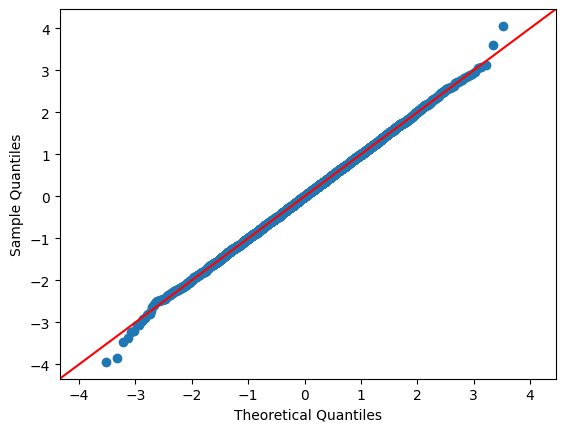

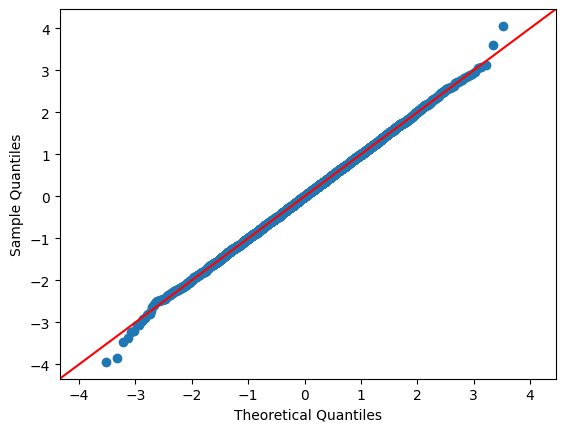

In [ ]:
#############To assess whether a given dataset follows a specific probability distribution or not.##############################
#Importation of the statsmodels library

#Definition of the parameters
mu, sigma = 32, 18

# qqplot
ech = np.random.normal(loc = mu, scale= sigma, size = 4708)
sm.qqplot(ech, fit = True, line = '45')

In [ ]:
############### Pearson Correlation test #######################################
#H0 : corr(x = df_atp["prob_elo"], y = df_atp["Wsets"])  = 0
#H1 : corr(x = df_atp["prob_elo"], y = df_atp["Wsets"]) != 0
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x=df_atp["proba_elo"], y=df_atp["WRank"])

print("p-value:", p_value)
print("coefficient:", correlation)

p-value: 0.0
coefficient: -0.37916416885757825


<ipython-input-19-48cbfce3c226>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_atp.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

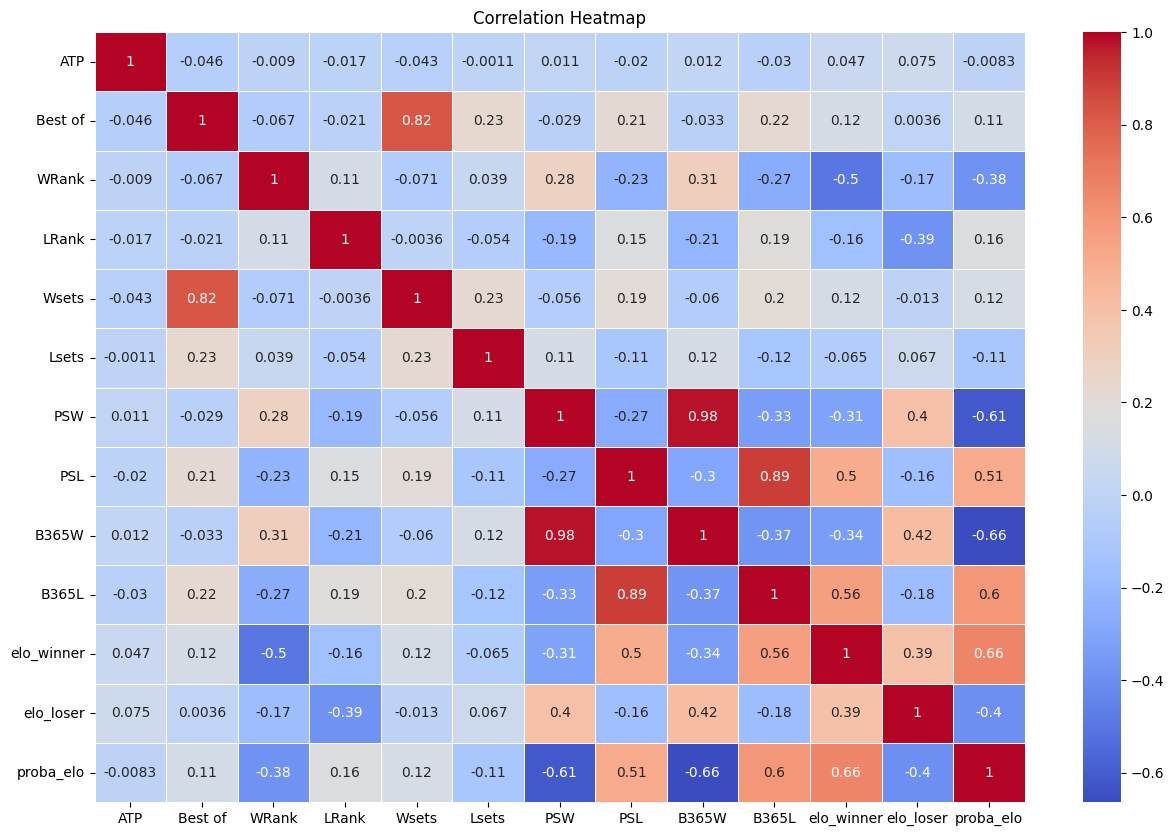

In [ ]:
# correlation between different variables vizulised through Heatmap

# Calculate the correlation matrix
correlation_matrix = df_atp.corr()

# Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
# plt.show()

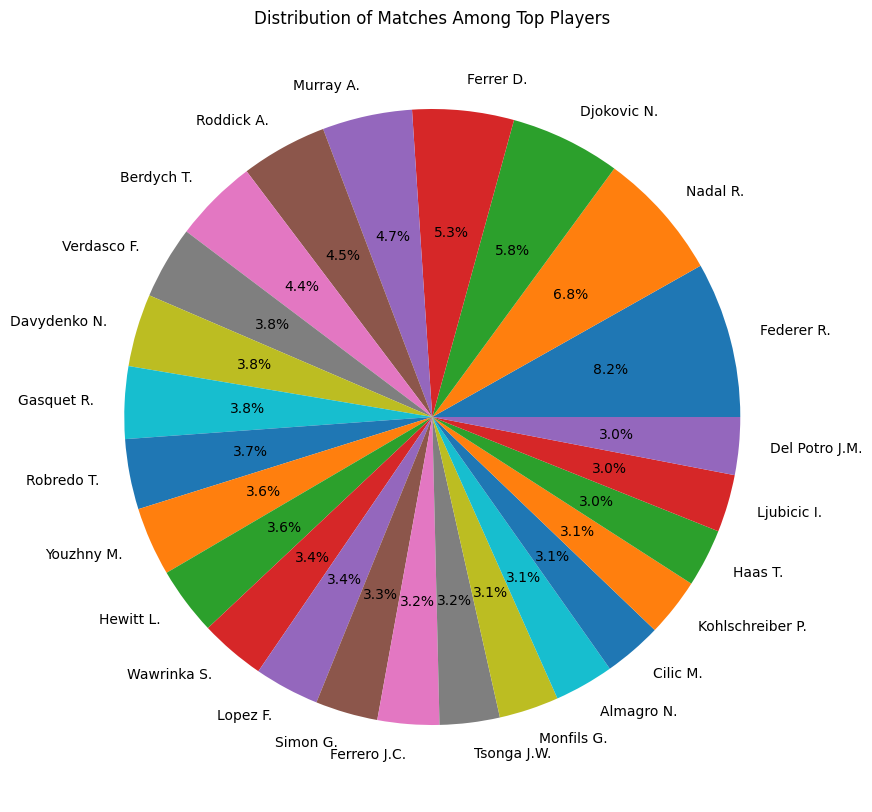

In [ ]:
## Vizualization the matches are being distributed among the top players

# Group the data by player name and count the number of occurrences
player_counts = df_atp['Winner'].value_counts()

# Select the top N most competitive players
top_players = player_counts.head(25)

# Create a pie chart for the most competitive players
plt.figure(figsize=(15, 10))
plt.pie(top_players.values, labels=top_players.index, autopct='%1.1f%%')
plt.title('Distribution of Matches Among Top Players')

# Display the pie chart
plt.show()

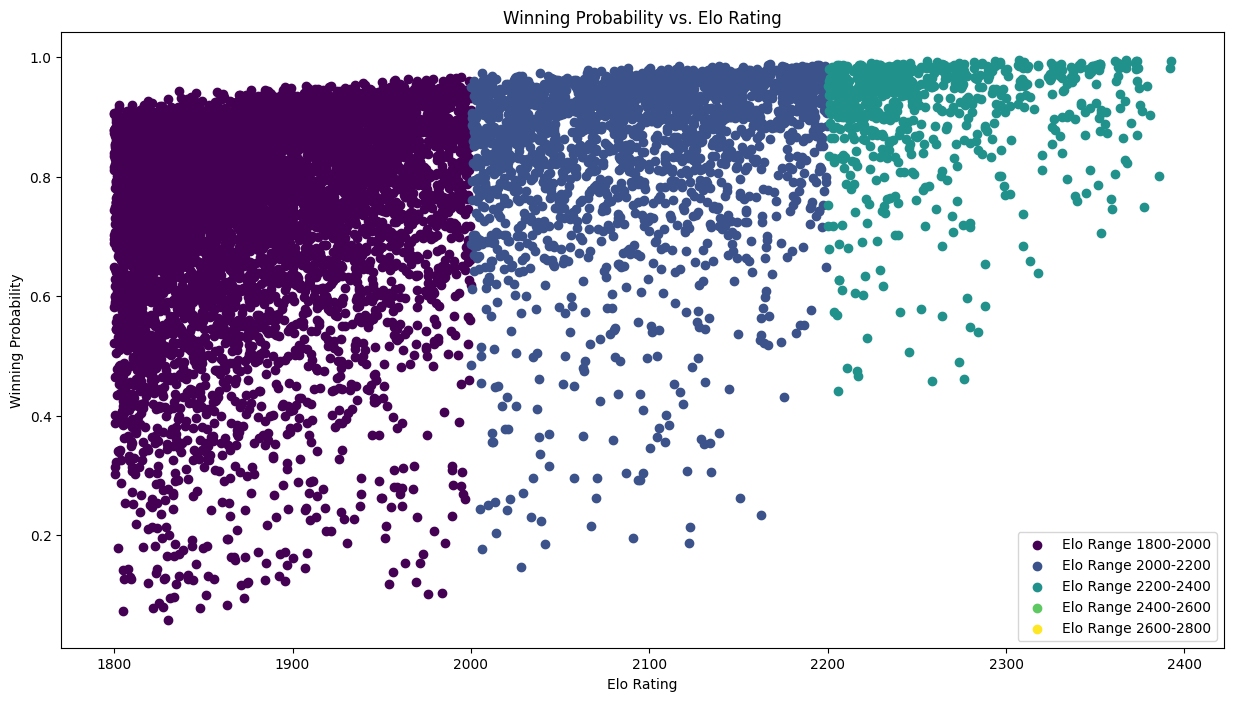

In [ ]:
# comparison between the elo winners and the probability of their winning

# Sort the data by Elo rating
sorted_data = df_atp.sort_values('elo_winner')

# Set color ranges
elo_ranges = [(1800, 2000), (2000, 2200), (2200, 2400), (2400, 2600), (2600, 2800)]

# Create a colormap with different colors for each range
colors = plt.cm.viridis(np.linspace(0, 1, len(elo_ranges)))

# Create a line plot with different colors for each range
plt.figure(figsize=(15, 8))
for i, (elo_min, elo_max) in enumerate(elo_ranges):
    range_data = sorted_data[(sorted_data['elo_winner'] >= elo_min) & (sorted_data['elo_winner'] < elo_max)]
    plt.scatter(range_data['elo_winner'], range_data['proba_elo'], color=colors[i], marker='o', label=f'Elo Range {elo_min}-{elo_max}')

# Set the plot title and labels
plt.title('Winning Probability vs. Elo Rating')
plt.xlabel('Elo Rating')
plt.ylabel('Winning Probability')
plt.legend()

# Display the plot
plt.show()

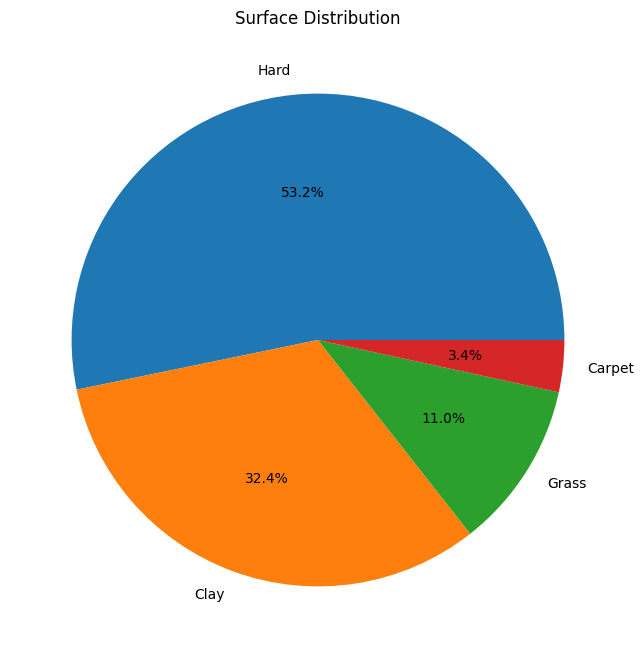

In [ ]:
# Pie Chart vizualization for the Distribution of Surface

surface_distribution = df_atp['Surface'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(surface_distribution, labels=surface_distribution.index, autopct='%1.1f%%')
plt.title('Surface Distribution')
plt.show()

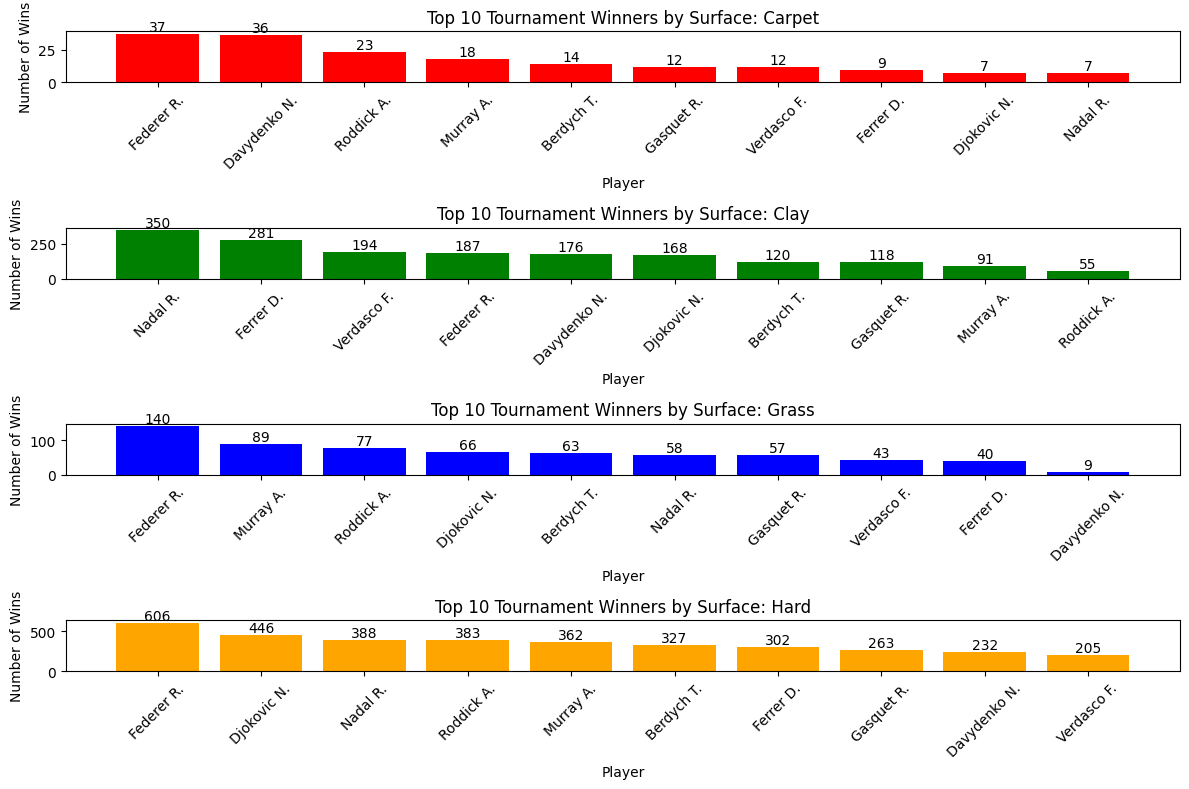

In [ ]:
#Vizualization of top ten winnwers according to the ground/surface

# Filter for top 10 players
top_10_players = df_atp['Winner'].value_counts().nlargest(10).index

# Filter the dataframe for top 10 players and group by surface and winner
top_10_winners_by_surface = df_atp[df_atp['Winner'].isin(top_10_players)].groupby(['Surface', 'Winner']).size().reset_index(name='Wins')

# Sort by surface and number of wins
top_10_winners_by_surface = top_10_winners_by_surface.sort_values(['Surface', 'Wins'], ascending=[True, False])

# Create a separate bar chart for each surface
surfaces = top_10_winners_by_surface['Surface'].unique()
num_surfaces = len(surfaces)

colors = ['red', 'green', 'blue', 'orange']  # Add more colors if needed

plt.figure(figsize=(12, 8))

for i, surface in enumerate(surfaces):
    surface_data = top_10_winners_by_surface[top_10_winners_by_surface['Surface'] == surface][:10]  # Limit to top 10 winners per surface

    plt.subplot(num_surfaces, 1, i+1)
    bars = plt.bar(surface_data['Winner'], surface_data['Wins'], color=colors[i % len(colors)])
    plt.title(f'Top 10 Tournament Winners by Surface: {surface}')
    plt.xlabel('Player')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the number on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()


# **3. Data cleaning and Preprocessing**



In [ ]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,Arazi H.,206,35,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [ ]:
# Drop rows with missing values in ['PSW', 'PSL', 'B365W', 'B365L']
df_atp_droped = df_atp.dropna(subset=['PSW', 'PSL', 'B365W', 'B365L'])

# Print the cleaned DataFrame
df_atp_droped.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
8678,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Ulihrach B.,Kiefer N.,246,58,2.0,0.0,Completed,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
8679,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Youzhny M.,Schuettler R.,43,6,2.0,0.0,Completed,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
8680,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Sargsian S.,Carraz G.,39,67,2.0,1.0,Completed,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
8682,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Lisnard J.R.,Pless K.,97,440,2.0,0.0,Completed,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
8683,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Levy H.,Portas A.,111,85,2.0,0.0,Completed,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068


In [ ]:
print(df_atp_droped.shape)

(32343, 23)


Step-2. Removing irrelevant columns.

Here for the datset atp_data.csv, two irrelevent columns are found, these are Wsets and Lsets. These two will be removed otherwise the ML model can easily predict and the outcome of the model will be biased.

In [ ]:
# Create a list of irrelevant columns to remove
irrelevant_columns = ['Best of', 'Wsets', 'Lsets', 'Comment']

# Remove the irrelevant columns from the DataFrame
df_atp_droped_new = df_atp_droped.drop(irrelevant_columns, axis=1)

# Print the updated DataFrame to verify the changes
df_atp_droped_new.tail(10)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,WRank,LRank,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
44698,17,Dubai,Dubai Tennis Championships,2018-03-02,ATP500,Outdoor,Hard,Semifinals,Pouille L.,Krajinovic F.,15,34,1.66,2.40,1.57,2.37,1834.630840,1638.794519,0.755345
44699,18,Sao Paulo,Brasil Open,2018-03-02,ATP250,Indoor,Clay,Quarterfinals,Zeballos H.,Dutra Silva R.,69,106,1.88,2.05,1.80,2.00,1610.693929,1449.427986,0.716735
44700,18,Sao Paulo,Brasil Open,2018-03-02,ATP250,Indoor,Clay,Quarterfinals,Cuevas P.,Mayer L.,31,49,1.81,2.15,1.72,2.10,1639.369372,1667.333204,0.459843
44701,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,Fognini F.,Cuevas P.,20,31,1.75,2.24,1.66,2.20,1804.490826,1656.654380,0.700780
44702,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,Del Potro J.M.,Zverev A.,9,5,1.98,1.94,1.90,1.90,1953.402484,1890.407795,0.589676
44703,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,Bautista Agut R.,Pouille L.,23,15,1.65,2.43,1.66,2.20,1835.901543,1842.459807,0.490563
44704,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,Anderson K.,Donaldson J.,8,59,1.34,3.63,1.30,3.50,1843.576914,1647.967561,0.755103
44705,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,Jarry N.,Zeballos H.,73,69,1.85,2.09,1.90,1.90,1588.293069,1619.758421,0.454841
44706,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,Del Potro J.M.,Anderson K.,9,8,1.52,2.75,1.50,2.62,1966.532849,1851.413609,0.659862
44707,18,Sao Paulo,Brasil Open,2018-03-04,ATP250,Indoor,Clay,The Final,Fognini F.,Jarry N.,20,73,1.38,3.38,1.36,3.25,1814.065865,1605.738153,0.768388


In [ ]:
import pandas as pd
import numpy as np

# Rename the columns 'Loser' and 'Winner' to 'Player 1' and 'Player 2'
df_atp_droped_new.rename(columns={'Loser': 'Player 1', 'Winner': 'Player 2', 'WRank' : 'Rank_P2', 'LRank' : 'Rank_P1',
                                                  'PSW' : 'PS_P2', 'PSL' : 'PS_P1', 'B365W' : 'B365_P2', 'B365L' : 'B365_P1',
                                                  'elo_winner' : 'elo_P2', 'elo_loser' : 'elo_P1'}, inplace=True)

df_atp_droped_new.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Player 2,Player 1,Rank_P2,Rank_P1,PS_P2,PS_P1,B365_P2,B365_P1,elo_P2,elo_P1,proba_elo
8678,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,Ulihrach B.,Kiefer N.,246,58,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
8679,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,Youzhny M.,Schuettler R.,43,6,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
8680,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,Sargsian S.,Carraz G.,39,67,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
8682,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,Lisnard J.R.,Pless K.,97,440,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
8683,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,Levy H.,Portas A.,111,85,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068


In [ ]:
# Target Variable Creation
import pandas as pd
import numpy as np
from prompt_toolkit.styles import named_colors

# Set the random seed for reproducibility
np.random.seed(42)

### conversion of text based values intu neumaric values
df_copy = df_atp_droped_new.copy(deep=True)

def create_target_variable(df):
  """
  """

  target = []

  for index, row in df.iterrows():
    player_1 = row['Player 1']
    player_2 = row['Player 2']
    rank_p2 = row['Rank_P2']
    rank_p1 = row['Rank_P1']
    ps_p2 = row['PS_P2']
    ps_p1 = row['PS_P1']
    b365_p2 = row['B365_P2']
    b365_p1 = row['B365_P1']
    elo_p2 = row['elo_P2']
    elo_p1 = row['elo_P1']

    # Simulate a coin toss to determine the target variable
    coin_toss = np.random.randint(0,2)  # Randomly generate either 0 or 1

    # Define your target variable conditions based on the coin toss
    if coin_toss == 0:
      target.append(0)  # Player 1 is the winner
    else:
      target.append(1)  # Player 2 is the winner
      # Swap 'Player 1' and 'Player 2' columns
      df.at[index, 'Player 1'], df.at[index, 'Player 2'] = player_2, player_1 #take other variables into account

      # Swap 'PSW' and 'PSL' columns
      df.at[index, 'Rank_P1'], df.at[index, 'Rank_P2'] = rank_p2, rank_p1

      # Swap 'PSW' and 'PSL' columns
      df.at[index, 'PS_P1'], df.at[index, 'PS_P2'] = ps_p2, ps_p1

      # Swap 'B365W' and 'B365L' columns
      df.at[index, 'B365_P1'], df.at[index, 'B365_P2'] = b365_p2, b365_p1

      # Swap 'PSW' and 'PSL' columns
      df.at[index, 'elo_P1'], df.at[index, 'elo_P1'] = elo_p2, elo_p1

  return target

# Create the target variable using the function
df_copy['Winning Player'] = create_target_variable(df_copy)

# Normalization of the features

# iteration of changing string to numaric by column
def change_numaric_by_column(df,col_name, dict_for_df):
  dict_for_df[col_name] = {}
  temp_dict = dict_for_df[col_name]
  value = 0
  for ind, name_string in df[col_name].items():
    if name_string in temp_dict:
      old_val = temp_dict[name_string]
      df.at[ind, col_name] = old_val
    else:
      temp_dict[name_string] = value
      df.at[ind, col_name] = value
      value += 1

# Iteration of changing string to numeric in the dataset
def change_string_to_numeric_in_df(df, df_encoded_dict):
  for column in df.columns:
    df_col = df[column]
    # Check column data is string or not
    if df_col.dtype == 'O':
      change_numaric_by_column(df,column,df_encoded_dict)

df_encoded_dict = {}
change_string_to_numeric_in_df(df_copy, df_encoded_dict)

print(' df encoded dict ', df_encoded_dict)
# Normalization of Date

# Sort the DataFrame by 'Date' in ascending order
df_copy_desc = df_copy.sort_values(by='Date', ascending=False)

# Extract date components into separate columns
df_copy_desc['Year'] = df_copy_desc['Date'].dt.year
df_copy_desc['Month'] = df_copy_desc['Date'].dt.month
df_copy_desc['Day'] = df_copy_desc['Date'].dt.day

df_copy_desc.head(32000)

 df encoded dict  {'Location': {'Doha': 0, 'Chennai': 1, 'Adelaide': 2, 'Auckland': 3, 'Sydney': 4, 'Melbourne': 5, 'Vina del Mar': 6, 'San Jose': 7, 'Milan': 8, 'Memphis': 9, 'Rotterdam': 10, 'Buenos Aires': 11, 'Marseille': 12, 'Costa Do Sauipe': 13, 'Dubai ': 14, 'Scottsdale': 15, 'Acapulco': 16, 'Indian Wells': 17, 'Miami': 18, 'Valencia': 19, 'Houston': 20, 'Estoril ': 21, 'Monte Carlo': 22, 'Barcelona': 23, 'Munich': 24, 'Rome': 25, 'Hamburg': 26, 'St. Polten': 27, 'Casablanca': 28, 'Paris': 29, 'Queens Club': 30, 'Halle': 31, 'Nottingham': 32, "'s-Hertogenbosch": 33, 'London': 34, 'Bastad': 35, 'Gstaad': 36, 'Newport': 37, 'Los Angeles': 38, 'Stuttgart': 39, 'Amersfoort': 40, 'Kitzbuhel': 41, 'Umag': 42, 'Indianapolis': 43, 'Toronto': 44, 'Cincinnati': 45, 'Sopot': 46, 'Washington': 47, 'Long Island': 48, 'New York': 49, 'Bucharest': 50, 'Delray Beach': 51, 'Beijing': 52, 'Palermo': 53, 'Shanghai': 54, 'Bangkok': 55, 'Tokyo': 56, 'Lyon': 57, 'Moscow': 58, 'Vienna': 59, 'Metz': 6

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Player 2,Player 1,Rank_P2,Rank_P1,PS_P2,PS_P1,B365_P2,B365_P1,elo_P2,elo_P1,proba_elo,Winning Player,Year,Month,Day
44707,18,83,13,2018-03-04,5,1,1,4,323,722,20,73,1.38,3.380,1.360,3.250,1814.065865,1605.738153,0.768388,0,2018,3,4
44706,16,16,16,2018-03-04,6,0,0,4,320,443,9,8,1.52,2.750,1.500,2.620,1966.532849,1851.413609,0.659862,0,2018,3,4
44705,18,83,13,2018-03-03,5,1,1,3,704,517,73,69,1.85,2.090,1.900,1.900,1588.293069,1619.758421,0.454841,0,2018,3,3
44704,16,16,16,2018-03-03,6,0,0,3,711,443,59,8,3.63,1.340,3.500,1.300,1843.576914,1647.967561,0.755103,1,2018,3,3
44703,17,14,86,2018-03-03,6,0,0,4,667,773,15,23,2.43,1.650,2.200,1.660,1835.901543,1842.459807,0.490563,1,2018,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,12,10,10,2004-02-17,2,1,0,0,15,61,37,18,2.01,1.855,2.100,1.667,1607.038976,1609.699191,0.496172,0,2004,2,17
9067,11,9,9,2004-02-17,2,1,0,0,135,40,273,46,3.35,1.364,3.250,1.280,1634.575897,1475.669139,0.713969,1,2004,2,17
9066,12,10,10,2004-02-17,2,1,0,0,52,49,20,11,3.15,1.400,2.750,1.400,1814.241122,1662.269272,0.705748,1,2004,2,17
9064,12,10,10,2004-02-17,2,1,0,0,75,42,90,62,2.30,1.676,1.909,1.800,1535.485398,1515.696072,0.528448,1,2004,2,17


# **Report -2: Modeling Report**

In [ ]:
# Machine Learning Model Starts here


# All python module associated with MM go here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Data Splitting

X = df_copy_desc.drop(columns=['Winning Player', 'Date'])
y = df_copy_desc['Winning Player']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [ ]:
#####Logistic Regression Model
model1_lr = LogisticRegression()
model1_lr.fit(X_train, y_train)

# Evaluate the model on the training data
train_score_lr = model1_lr.score(X_train, y_train)
print('train score : ', train_score_lr)

# Evaluate the model on the test data
test_score_lr = model1_lr.score(X_test, y_test)
print('test score : ', test_score_lr)

# Make predictions on the test set
y_pred_lr = model1_lr.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", confusion_mat)

train score :  0.6894565973564196
test score :  0.7078373782655742
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      3187
           1       0.71      0.72      0.71      3282

    accuracy                           0.71      6469
   macro avg       0.71      0.71      0.71      6469
weighted avg       0.71      0.71      0.71      6469

Confusion Matrix:
 [[2220  967]
 [ 923 2359]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##### Decision Tree

# Decision Tree initialization
model2_dt = DecisionTreeClassifier()
# Fit transformation
model2_dt.fit(X_train, y_train)

# Evaluate the model on the training data
train_score_dt = model2_dt.score(X_train, y_train)
print('TRAIN SCORES : ', train_score_dt)

# Evaluate the model on the test data
test_score_dt = model2_dt.score(X_test, y_test)
print('TEST SCORES : ', test_score_dt)

# Make predictions on the test set
y_pred_dt = model2_dt.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", confusion_mat)

TRAIN SCORES :  1.0
TEST SCORES :  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3187
           1       1.00      1.00      1.00      3282

    accuracy                           1.00      6469
   macro avg       1.00      1.00      1.00      6469
weighted avg       1.00      1.00      1.00      6469

Confusion Matrix:
 [[3187    0]
 [   0 3282]]


In [ ]:
### Random forest


# Random Forest Classifier
model3_rf = RandomForestClassifier()
model3_rf.fit(X_train, y_train)

# Evaluate the model on the training data
train_score_rf = model3_rf.score(X_train, y_train)
print('TRAIN SCORES : ', train_score_rf)

# Evaluate the model on the test data
test_score_rf = model3_rf.score(X_test, y_test)
print('TEST SCORES : ', test_score_rf)

# Make predictions on the test set
y_pred_rf = model3_rf.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", confusion_mat)

TRAIN SCORES :  1.0
TEST SCORES :  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3187
           1       1.00      1.00      1.00      3282

    accuracy                           1.00      6469
   macro avg       1.00      1.00      1.00      6469
weighted avg       1.00      1.00      1.00      6469

Confusion Matrix:
 [[3187    0]
 [   0 3282]]


In [ ]:
######SVC
model4_svm = SVC(max_iter=10)
model4_svm.fit(X_train, y_train)

# Evaluate the model on the training data
train_score_svm = model4_svm.score(X_train, y_train)
print('TRAIN SCORES : ', train_score_svm)

# Evaluate the model on the test data
test_score_svm = model4_svm.score(X_test, y_test)
print('TEST SCORES : ', test_score_svm)

model4_svm = SVC()
model4_svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = model4_svm.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", confusion_mat)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


TRAIN SCORES :  0.49965216046996985
TEST SCORES :  0.5081156283815118
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63      3187
           1       0.64      0.68      0.66      3282

    accuracy                           0.65      6469
   macro avg       0.65      0.65      0.65      6469
weighted avg       0.65      0.65      0.65      6469

Confusion Matrix:
 [[1949 1238]
 [1035 2247]]


In [ ]:
#######  KNN
model5_knn = KNeighborsClassifier()
model5_knn.fit(X_train, y_train)

# Evaluate the model on the training data
train_score_knn = model5_knn.score(X_train, y_train)
print("Training Score:", train_score_knn)

# Evaluate the model on the test data
test_score_knn = model5_knn.score(X_test, y_test)
print("Test Score:", test_score_knn)

# Make predictions on the test set
y_pred_knn = model5_knn.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", confusion_mat)

Training Score: 0.8636082553915128
Test Score: 0.7795640748183645
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      3187
           1       0.79      0.78      0.78      3282

    accuracy                           0.78      6469
   macro avg       0.78      0.78      0.78      6469
weighted avg       0.78      0.78      0.78      6469

Confusion Matrix:
 [[2496  691]
 [ 735 2547]]


In [ ]:
# Assuming df_atp is your DataFrame containing the ATP dataset
# Assuming target variable is 'Winning Player' with 1 representing Player 1 won and 2 representing Player 2 won

# Create a new column to store the bookmaker's prediction (1 or 2) based on the highest value between PSL and PSW
df_copy_desc['Bookmaker_Prediction1'] = df_copy_desc[['PS_P1', 'PS_P2']].idxmax(axis=1).apply(lambda x: 0 if 'P1' in x else 1)

# Compare the bookmaker's prediction with the target variable and create a new column for correctness
df_copy_desc['Bookmaker_Correct'] = df_copy_desc['Bookmaker_Prediction1'] == df_copy_desc['Winning Player']

# Calculate the accuracy of the bookmaker's predictions
bookmaker_accuracy = df_copy_desc['Bookmaker_Correct'].mean()

# Print the accuracy
print("PS Bookmaker Accuracy:", bookmaker_accuracy)

PS Bookmaker Accuracy: 0.7033979531892527


In [ ]:
# Create a new column to store the bookmaker's prediction (1 or 2) based on the highest value between B365_P1 and B365_P2
df_copy_desc['Bookmaker_Prediction2'] = df_copy_desc[['B365_P1', 'B365_P2']].idxmax(axis=1).apply(lambda x: 0 if 'P1' in x else 1)

# Compare the bookmaker's prediction with the target variable and create a new column for correctness
df_copy_desc['Bookmaker_Correct_B365'] = df_copy_desc['Bookmaker_Prediction2'] == df_copy_desc['Winning Player']

# Calculate the accuracy of the bookmaker's predictions
bookmaker_accuracy_b365 = df_copy_desc['Bookmaker_Correct_B365'].mean()

# Print the accuracy
print("B365 Bookmaker Accuracy:", bookmaker_accuracy_b365)

B365 Bookmaker Accuracy: 0.7022848839006894


In [ ]:
# Calculate the accuracy of each model on the test data
model_accuracies = {
    'Logistic Regression': test_score_lr,
    'Decision Tree': test_score_dt,
    'Random Forest': test_score_rf,
    'SVM': test_score_svm,
    'KNN': test_score_knn
}

# Calculate the accuracy of the bookmakers' predictions based on PS (PSL and PSW)
bookmaker_accuracy_ps = df_copy_desc['Bookmaker_Correct'].mean()

# Calculate the accuracy of the bookmakers' predictions based on B365 (B365_P1 and B365_P2)
bookmaker_accuracy_b365 = df_copy_desc['Bookmaker_Correct_B365'].mean()

# Create a DataFrame to store the accuracy values
comparison_table = pd.DataFrame({
    'Model': list(model_accuracies.keys()) + ['Bookmakers PS', 'Bookmakers B365'],
    'Accuracy': list(model_accuracies.values()) + [bookmaker_accuracy_ps, bookmaker_accuracy_b365]
})

# Sort the DataFrame by accuracy in descending order
comparison_table = comparison_table.sort_values(by='Accuracy', ascending=False)

# Display the comparison table
print(comparison_table)

                 Model  Accuracy
1        Decision Tree  1.000000
2        Random Forest  1.000000
4                  KNN  0.779564
0  Logistic Regression  0.707837
5        Bookmakers PS  0.703398
6      Bookmakers B365  0.702285
3                  SVM  0.508116


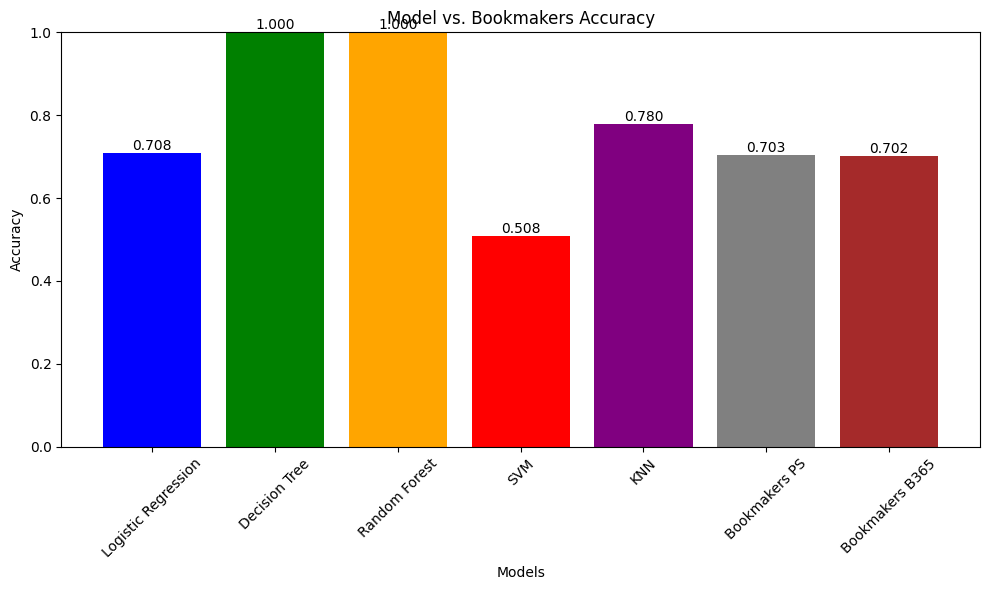

In [ ]:
import matplotlib.pyplot as plt

# Data
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
bookmaker_ps_accuracy = bookmaker_accuracy_ps
bookmaker_b365_accuracy = bookmaker_accuracy_b365

# Add bookmakers' accuracies to the list of accuracies
accuracies.extend([bookmaker_ps_accuracy, bookmaker_b365_accuracy])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models + ['Bookmakers PS', 'Bookmakers B365'], accuracies, color=['blue', 'green', 'orange', 'red', 'purple', 'grey', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model vs. Bookmakers Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Display the values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()